In [2]:
import pandas as pd
import numpy as np

In [3]:
price = pd.read_excel('data.xlsx', sheet_name='arabica_ratings_raw')
columns = price.loc[0]
price = price.rename(columns=columns)
columns = price.columns[2]
price = price[columns]
price = price.loc[1:]
price = price.reset_index()
price.drop('index', inplace=True, axis=1)

In [4]:
data = pd.read_csv('arabica_ratings_raw.csv')

In [54]:
columns = data.columns
columns

Index(['quality_score', 'Country of Origin', 'Variety', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points',
       'Total Cup Points', 'Moisture', 'Category One Defects', 'Quakers',
       'Color', 'Category Two Defects'],
      dtype='object')

In [5]:
data = data[['quality_score','Country of Origin','Variety','Processing Method','Aroma','Flavor', 'Aftertaste', 'Acidity',
             'Body', 'Balance', 'Uniformity', 'Clean Cup', 'Sweetness', 'Cupper Points','Total Cup Points','Moisture',
             'Category One Defects', 'Quakers', 'Color', 'Category Two Defects']]

In [68]:
data

,quality_score,Country of Origin,Variety,Processing Method,Aroma,Flavor,Aftertaste,Acidity,Body,Balance,Uniformity,Clean Cup,Sweetness,Cupper Points,Total Cup Points,Moisture,Category One Defects,Quakers,Color,Category Two Defects
0,90.58,Ethiopia,Unknown,Washed / Wet,8.67,8.83,8.67,8.75,8.50,8.42,10.00,10.00,10.00,8.75,90.58,12.0,0.0,0.0,Green,0.0
1,89.92,Ethiopia,Other,Washed / Wet,8.75,8.67,8.50,8.58,8.42,8.42,10.00,10.00,10.00,8.58,89.92,12.0,0.0,0.0,Green,1.0
2,89.75,Guatemala,Bourbon,Unknown,8.42,8.50,8.42,8.42,8.33,8.42,10.00,10.00,10.00,9.25,89.75,0.0,0.0,0.0,Unknown,0.0
3,89.00,Ethiopia,Unknown,Natural / Dry,8.17,8.58,8.42,8.42,8.50,8.25,10.00,10.00,10.00,8.67,89.00,11.0,0.0,0.0,Green,2.0
4,88.83,Ethiopia,Other,Washed / Wet,8.25,8.50,8.25,8.50,8.42,8.33,10.00,10.00,10.00,8.58,88.83,12.0,0.0,0.0,Green,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1307,67.92,Haiti,Typica,Natural / Dry,6.75,6.58,6.42,6.67,7.08,6.67,9.33,6.00,6.00,6.42,67.92,14.0,8.0,0.0,Blue-Green,16.0
1308,63.08,Nicaragua,Caturra,Other,7.25,6.58,6.33,6.25,6.42,6.08,6.00,6.00,6.00,6.17,63.08,13.0,1.0,0.0,Green,5.0
1309,59.83,Guatemala,Catuai,Washed / Wet,7.50,6.67,6.67,7.67,7.33,6.67,8.00,1.33,1.33,6.67,59.83,10.0,0.0,0.0,Green,4.0
1310,43.13,Ethiopia,Unknown,Unknown,6.00,6.00,6.25,6.88,6.00,6.00,0.00,0.00,0.00,6.00,43.13,0.0,0.0,0.0,Unknown,0.0


In [6]:
data['Total Cup Points'] = data['Total Cup Points'].apply(lambda x: float(x.replace('Sample', '')))
data['Moisture'] = data['Moisture'].apply(lambda x: float(x.replace('%', '')))
data['Category One Defects'] = data['Category One Defects'].apply(lambda x: float(x.replace('full defects', '')))
data['Category Two Defects'] = data['Category Two Defects'].apply(lambda x: float(x.replace('full defects', '')))

In [7]:
data['Quakers'] = data['Quakers'].fillna(0)
data['Variety'] = data['Variety'].fillna('Unknown')
data['Processing Method'] = data['Processing Method'].fillna('Unknown')
data['Color'] = data['Color'].fillna('Unknown')
data['Country of Origin'] = data['Country of Origin'].fillna('Unknown')

In [8]:
Color = pd.get_dummies(data[['Color']], prefix=['Color'])
Processing_Method = pd.get_dummies(data[['Processing Method']], prefix=['Processing Method'])
Variety = pd.get_dummies(data[['Variety']], prefix=['Variety'])
Country = pd.get_dummies(data[['Country of Origin']], prefix=['Country'])

In [9]:
data = pd.concat([data, Color, Processing_Method, Variety, Country], axis=1) #

In [10]:
data = data.drop(columns=['Variety', 'Processing Method', 'Color', 'Country of Origin'])

In [11]:
from sklearn.model_selection import train_test_split

# 30% examples in test data
train, test, train_labels, test_labels = train_test_split(data, price, 
                                                          stratify = price,
                                                          test_size = 0.3, 
                                                          random_state = 42)

In [12]:
from sklearn.ensemble import RandomForestRegressor

# Create the model with 100 trees
model = RandomForestRegressor(n_estimators=300, 
                               random_state=42, 
                               max_features = 'sqrt',
                               n_jobs=-1, verbose = 1)

# Fit on training data
model.fit(train, train_labels)

<ipython-input-12-2a2efdf1060c>:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(train, train_labels)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.5s finished


RandomForestRegressor(max_features='sqrt', n_estimators=300, n_jobs=-1,
                      random_state=42, verbose=1)

In [13]:
predictions = model.predict(test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [14]:
model.score(test, test_labels)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


-0.06731914468013112

In [15]:
# Calculate the absolute errors
errors = abs(predictions - test_labels['Price '])

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print('MAE: ', mean_absolute_error(test_labels['Price '], predictions))
print('MSE: ', mean_squared_error(test_labels['Price '], predictions)) 

MAE:  0.4282911449520583
MSE:  0.3007418312941029


In [17]:
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2))

Mean Absolute Error: 0.43


In [18]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels['Price '])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 94.26 %.


In [19]:
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[5]
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
# Pull out one tree from the forest
tree = model.estimators_[5]
# Export the image to a dot file
export_graphviz(tree, out_file = 'tree.dot', feature_names = data.columns, rounded = True, precision = 1)
# Use dot file to create a graph
(graph, ) = pydot.graph_from_dot_file('C:\\Users\\koala\\tree.dot')
# Write graph to a png file
graph.write_png('tree.png')

FileNotFoundError: [WinError 2] "dot" not found in path.

In [20]:
# Get numerical feature importances
importances = list(model.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(data.columns, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: quality_score        Importance: 0.08
Variable: Total Cup Points     Importance: 0.08
Variable: Aroma                Importance: 0.06
Variable: Flavor               Importance: 0.06
Variable: Aftertaste           Importance: 0.06
Variable: Acidity              Importance: 0.06
Variable: Body                 Importance: 0.06
Variable: Balance              Importance: 0.06
Variable: Cupper Points        Importance: 0.06
Variable: Category Two Defects Importance: 0.05
Variable: Moisture             Importance: 0.04
Variable: Category One Defects Importance: 0.02
Variable: Quakers              Importance: 0.02
Variable: Country_Thailand     Importance: 0.02
Variable: Uniformity           Importance: 0.01
Variable: Clean Cup            Importance: 0.01
Variable: Sweetness            Importance: 0.01
Variable: Color_Bluish-Green   Importance: 0.01
Variable: Color_Green          Importance: 0.01
Variable: Color_None           Importance: 0.01
Variable: Color_Unknown        Importanc

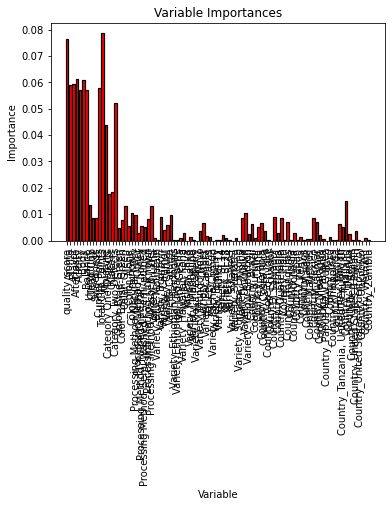

In [24]:
# list of x locations for plotting
x_values = list(range(len(importances)))
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical', color = 'r', edgecolor = 'k', linewidth = 1.2)
# Tick labels for x axis
plt.xticks(x_values, data.columns, rotation='vertical')
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

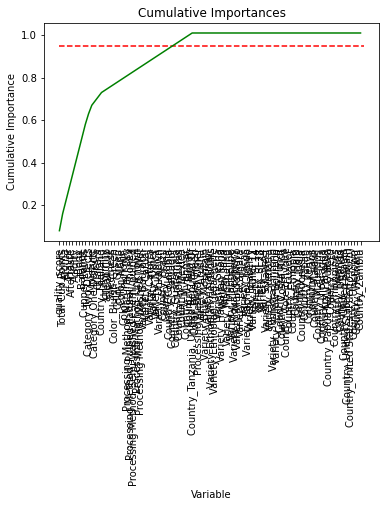

In [25]:
# List of features sorted from most to least important
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]
# Cumulative importances
cumulative_importances = np.cumsum(sorted_importances)
# Make a line graph
plt.plot(x_values, cumulative_importances, 'g-')
# Draw line at 95% of importance retained
plt.hlines(y = 0.95, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# Format x ticks and labels
plt.xticks(x_values, sorted_features, rotation = 'vertical')
# Axis labels and title
plt.xlabel('Variable'); plt.ylabel('Cumulative Importance'); plt.title('Cumulative Importances');

In [26]:
# Find number of features for cumulative importance of 95%
# Add 1 because Python is zero-indexed
print('Number of features for 95% importance:', np.where(cumulative_importances > 0.95)[0][0] + 1)

Number of features for 95% importance: 36


In [41]:
# Extract the names of the most important features
important_feature_names = [feature[0] for feature in feature_importances[0:35]]

In [43]:
# Create training and testing sets with only the important features
important_train_features = train[important_feature_names]
important_test_features = test[important_feature_names]

In [44]:
# Sanity check on operations
print('Important train features shape:', important_train_features.shape)
print('Important test features shape:', important_test_features.shape)

Important train features shape: (918, 35)
Important test features shape: (394, 35)


In [46]:
# Train the expanded model on only the important features
model.fit(important_train_features, train_labels);
# Make predictions on test data
predictions = model.predict(important_test_features)
# Performance metrics
errors = abs(predictions - test_labels['Price '])
print('Average absolute error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels['Price '])
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

<ipython-input-46-3844c1ad9c83>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(important_train_features, train_labels);
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s


Average absolute error: 0.43 degrees.
Accuracy: 94.24 %.


[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 300 out of 300 | elapsed:    0.0s finished


In [47]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 300,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 1,
 'warm_start': False}

In [48]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [49]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [50]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(train, train_labels)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


C:\Users\koala\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [53]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    
    return accuracy

best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, test, test_labels['Price '])

Model Performance
Average Error: 0.4222 degrees.
Accuracy = 94.34%.


In [54]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [55]:
grid_search.fit(train, train_labels)
grid_search.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\koala\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:880: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 100,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 12,
 'n_estimators': 100}

In [57]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, test, test_labels['Price '])

Model Performance
Average Error: 0.4196 degrees.
Accuracy = 94.37%.
